**Frozen Lake Problem Reinforcement Learning**<br>
The Frozen Lake environment is a 4×4 grid which contain four possible areas  — Safe (S), Frozen (F), Hole (H) and Goal (G). The agent moves around the grid until it reaches the goal or the hole. If it falls into the hole, it has to start from the beginning and is rewarded the value 0. The process continues until it learns from every mistake and reaches the goal eventually. Here is visual description of the Frozen Lake grid (4×4):<br><br>
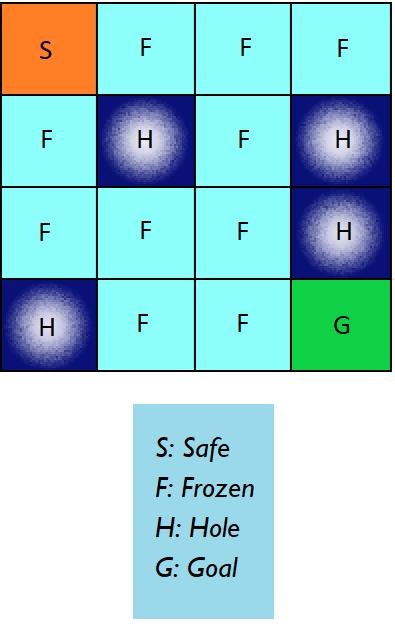



In [1]:
import numpy as np
import gym
import random

In [2]:
env = gym.make('FrozenLake-v0')

In [3]:
action_size = env.action_space.n
state_size = env.observation_space.n

In [4]:
qtable = np.zeros((state_size, action_size))
qtable

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [51]:
total_episodes = 15000
learning_rate = 0.1
max_steps = 100
gamma = 0.98
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.003

In [53]:
rewards = []

for episode in range(total_episodes):
  state = env.reset()
  step = 0
  done = False
  total_rewards = 0

  for step in range(max_steps):
    exp_exp_tradeoff = random.uniform(0, 1)

    if exp_exp_tradeoff > epsilon:
      # Exploit
      action = np.argmax(qtable[state, :])
    else:
      # Explore
      action = env.action_space.sample()
    
    new_state, reward, done, info = env.step(action)

    # Applying the Q-Learning Algo, which uses the bellman Equation.
    qtable[state, action] = qtable[state, action] + learning_rate*(reward+gamma*np.max(qtable[new_state, :]) - qtable[state, action])
    
    total_rewards += reward
    state = new_state
    
    if done == True:
      break

    # We minimize the value of the epsilon at some decay rate, so that our agen explores more at the initial states and exploit in the later states.
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
  rewards.append(total_rewards)
    
  
print(len(rewards))
rewards_per_thousand = np.split(np.array(rewards), total_episodes/1000)
count = 1000
print('Average reward per thousand Episodes.')
for i in rewards_per_thousand:
  print(count,':', sum(i/1000))
  count+=1000
print('**** Q-Table ****')
print(qtable)

15000
Average reward per thousand Episodes.
1000 : 0.23900000000000018
2000 : 0.6310000000000004
3000 : 0.6580000000000005
4000 : 0.6770000000000005
5000 : 0.6690000000000005
6000 : 0.6580000000000005
7000 : 0.6870000000000005
8000 : 0.7010000000000005
9000 : 0.7000000000000005
10000 : 0.6710000000000005
11000 : 0.6690000000000005
12000 : 0.6740000000000005
13000 : 0.6840000000000005
14000 : 0.7030000000000005
15000 : 0.6730000000000005
**** Q-Table ****
[[0.34131758 0.33456059 0.33480152 0.33572514]
 [0.23323005 0.23057269 0.21803608 0.31380962]
 [0.25593214 0.26516408 0.25860528 0.28615185]
 [0.16899387 0.20217943 0.18721339 0.27301629]
 [0.36933881 0.28228758 0.30316316 0.24569989]
 [0.         0.         0.         0.        ]
 [0.14499836 0.14641548 0.21381336 0.11128842]
 [0.         0.         0.         0.        ]
 [0.33407602 0.36387494 0.21084668 0.41663379]
 [0.35130525 0.46640315 0.3154284  0.3873423 ]
 [0.43079871 0.29866497 0.3490869  0.19884591]
 [0.         0.         

In [54]:
env.reset()

for episode in range(5):
  state = env.reset()
  step = 0
  done = False
  print('*************************************************************')
  print('Episode', episode)

  for step in range(max_steps):
    action = np.argmax(qtable[state, :])
    new_state, reward, done, info = env.step(action)

    if done:
      env.render()

      print('Number of Steps', step)
      break
    state = new_state
env.close()

*************************************************************
Episode 0
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of Steps 99
*************************************************************
Episode 1
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of Steps 13
*************************************************************
Episode 2
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of Steps 90
*************************************************************
Episode 3
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of Steps 6
*************************************************************
Episode 4
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of Steps 29


In [ ]:
|